This project develops machine learning models to predict Alzheimer’s disease diagnosis (0 = No, 1 = Yes) using demographic, clinical, lifestyle, and cognitive assessment data. The objective is to identify key predictive factors and compare model performance.

The dataset contains 2149 patients, with no missing values. The target distribution is moderately imbalanced (≈35% Alzheimer’s, 65% non-Alzheimer’s).

Methodology

Dataset size: 2,149 samples (Page 3) 

ML_Project

Target variable: Diagnosis (0 = No AD, 1 = AD) 

ML_Project

Class distribution:

64.6% No Alzheimer

35.4% Alzheimer 

ML_Project

→ Mild imbalance (acceptable)

Top common important features 
{'ADL', 'FunctionalAssessment', 'MMSE', 'BehavioralProblems', 'MemoryComplaints'} 

ML_Project

    Logistic Regression:

    Accuracy = 0.814

    ROC-AUC = 0.885 (Page 24) 

ML_Project

    Random Forest:

    Accuracy = 0.933

    ROC-AUC = 0.943 (Page 26) 



In [43]:
# Import Required Libraries
# ================================

# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sklearn - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Sklearn - Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [44]:
#Load the dataset
data = pd.read_csv('Data/alzheimers_disease_data.csv')
print(data.head())
print(data.info())
print(data.describe())

# 2) Missing values (overall + per column)
missing_per_col = data.isna().sum().sort_values(ascending=False)
print("\nMissing values per column (top 15):")
print(missing_per_col.head(15))

# 3) Basic types
print("\nDtypes:\n", data.dtypes)

# 4) Quick numeric summary
display(data.describe(include="number").T)

# 5) Quick categorical summary (top categories)
cat_cols_guess = data.select_dtypes(include=["object", "category"]).columns
for c in cat_cols_guess[:10]:  # show first 10 only
    print(f"\nColumn: {c}")
    print(data[c].value_counts(dropna=False).head(10))


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346



Column: DoctorInCharge
DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64


/var/folders/_r/1mtvh9nn1ns69vtxm47ygl1c0000gn/T/ipykernel_10713/2441348960.py:19: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols_guess = data.select_dtypes(include=["object", "category"]).columns


Diagnosis
0    1389
1     760
Name: count, dtype: int64

Percentage Distribution:
Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


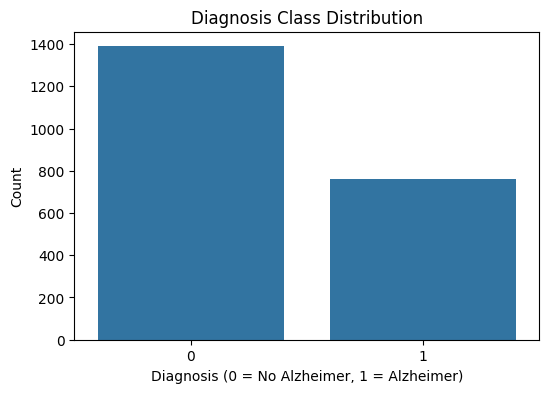

In [45]:
#Target distribution
# Count values
print(data["Diagnosis"].value_counts())

# Percentage distribution
print("\nPercentage Distribution:")
print(data["Diagnosis"].value_counts(normalize=True) * 100)

# Plot distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Diagnosis", data=data)
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis (0 = No Alzheimer, 1 = Alzheimer)")
plt.ylabel("Count")
plt.show()

['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']
X shape: (2149, 33)
y shape: (2149,)
Unique target values: [0 1]
Numerical Features: Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'Chole

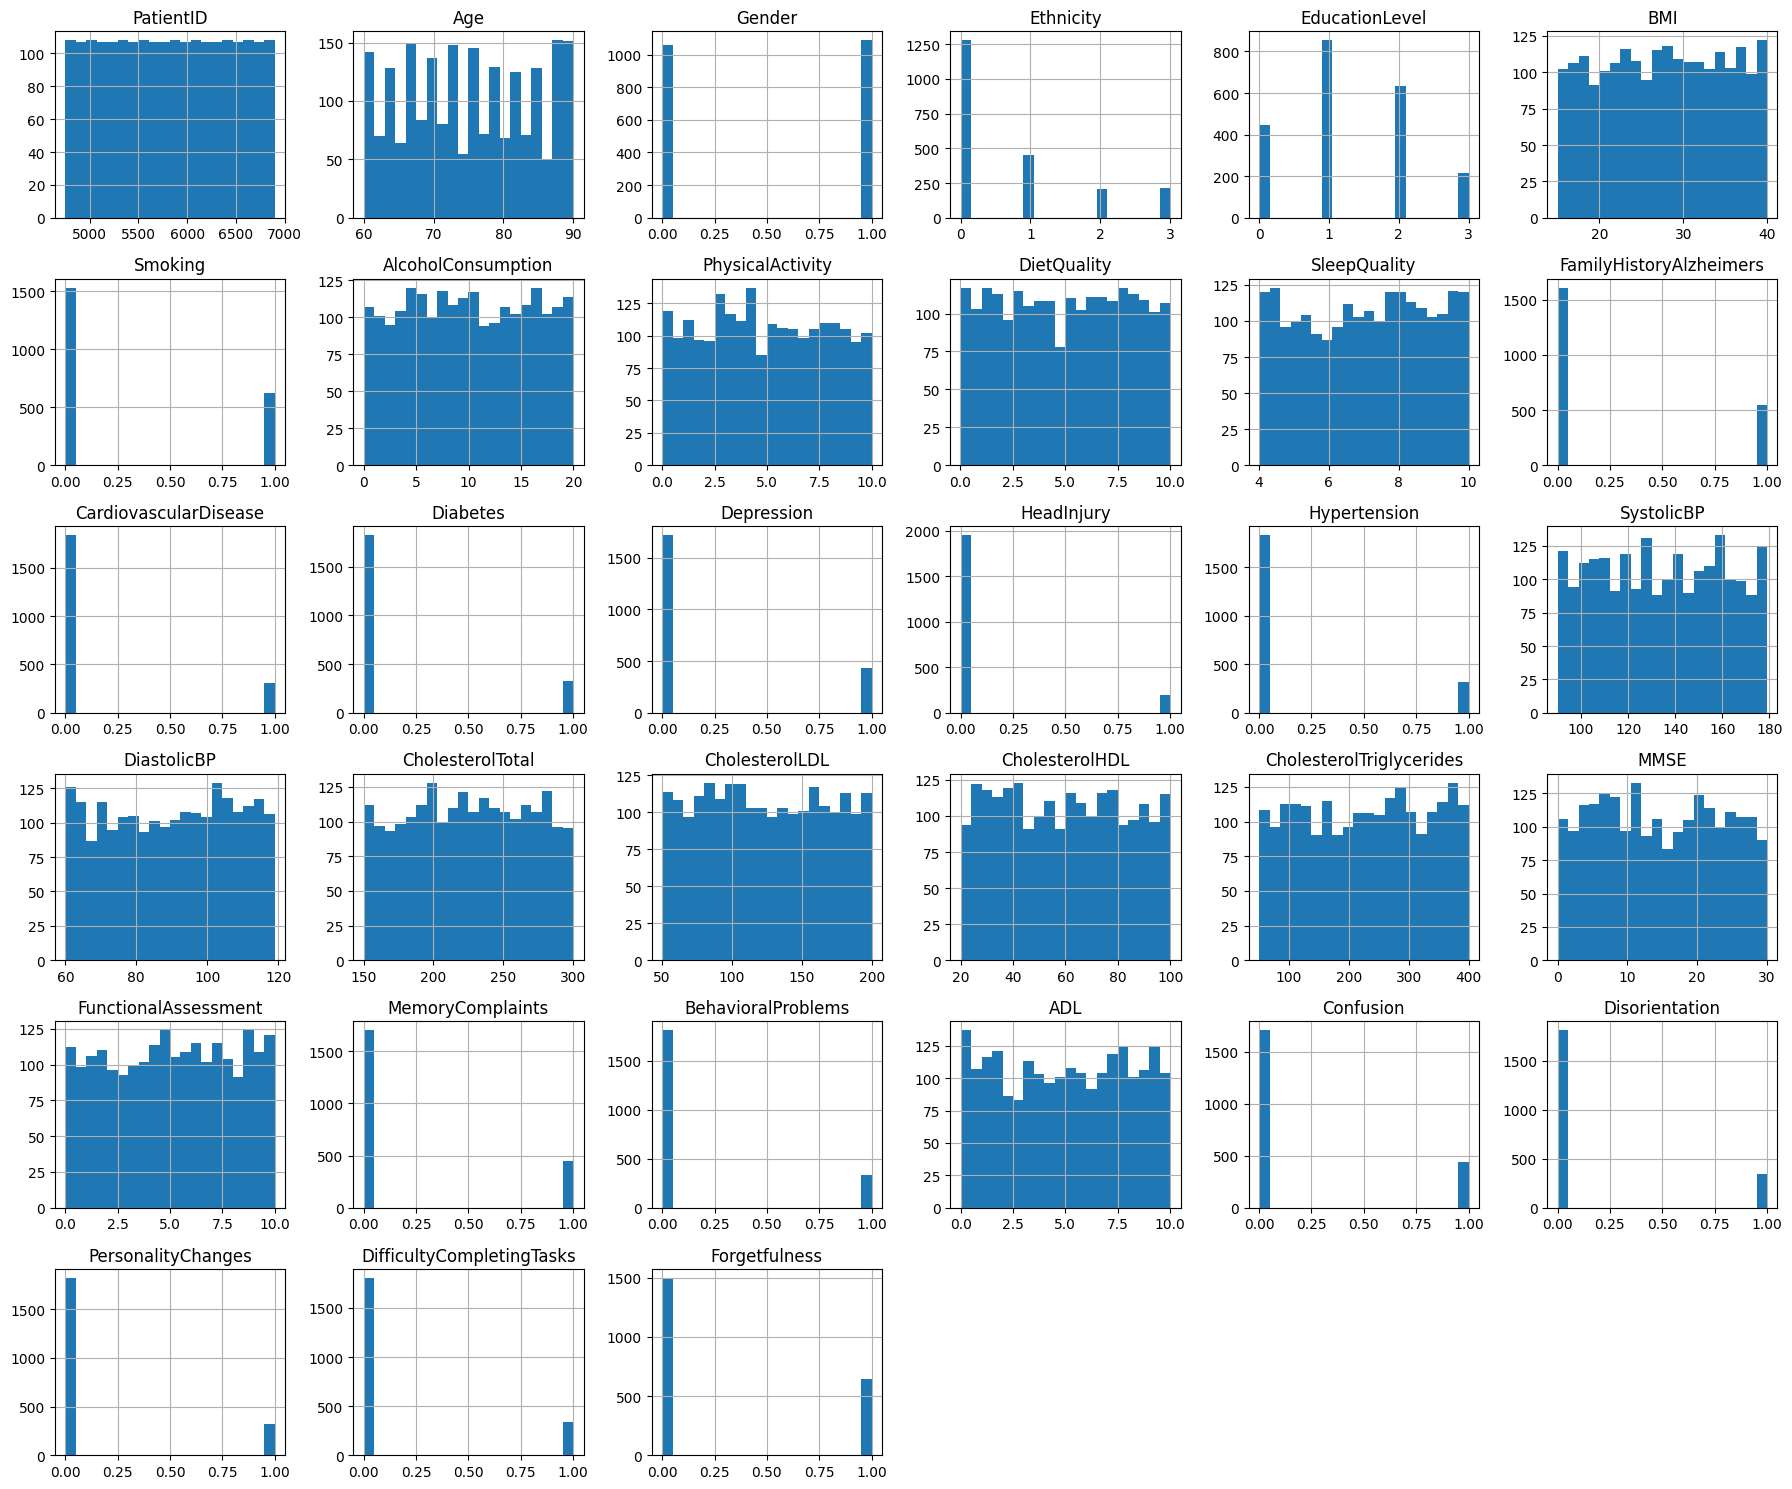

Binary Features: ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


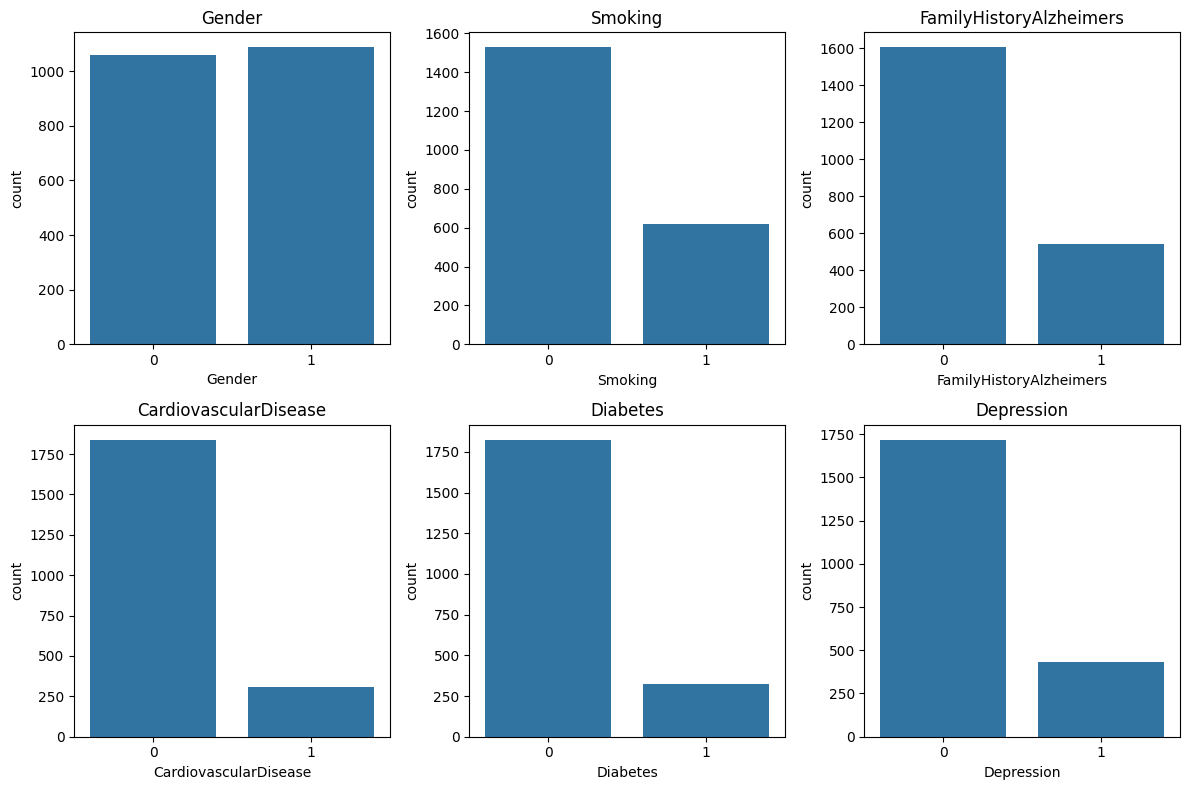

Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
PatientID                    0.041019
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007618
Ethnicity                   -0.014782
SystolicBP                  -0.015615
Confusion                   -0.019186
PersonalityChanges          -0.020627
Gender                      -0.020975
HeadInjury                  -0.021411
Disorientation              -0.024648
Diabetes    

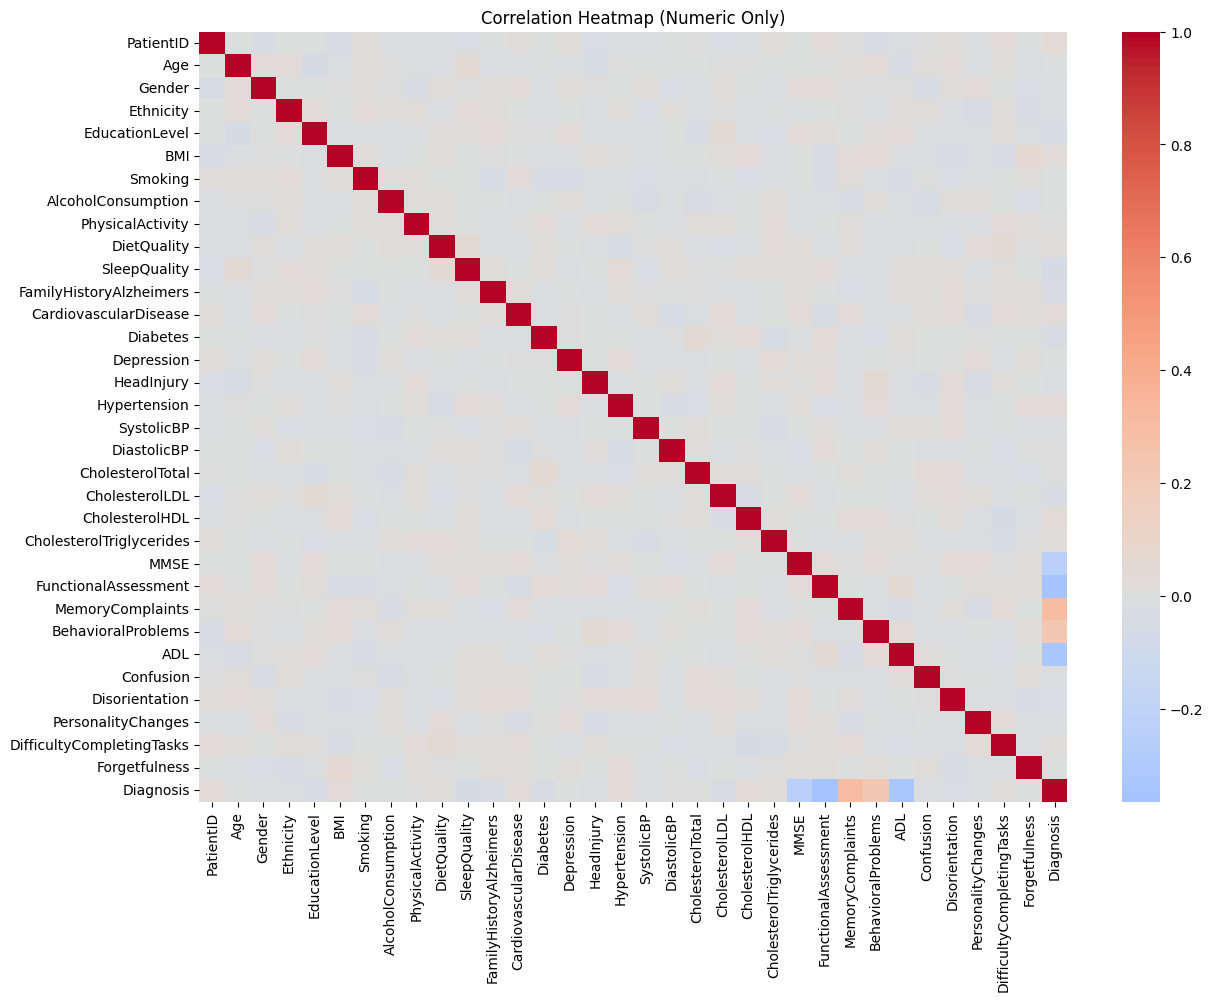

                      Feature        Chi2       p-value
10           MemoryComplaints  200.623704  1.526605e-45
11         BehavioralProblems  106.879217  4.731447e-25
1                   Ethnicity    6.302089  9.780307e-02
9                Hypertension    2.442487  1.180889e-01
4     FamilyHistoryAlzheimers    2.170309  1.406980e-01
6                    Diabetes    1.953177  1.622450e-01
5       CardiovascularDisease    1.947683  1.628367e-01
2              EducationLevel    4.453147  2.165077e-01
13             Disorientation    1.168140  2.797838e-01
0                      Gender    0.859716  3.538183e-01
8                  HeadInjury    0.836768  3.603227e-01
14         PersonalityChanges    0.797783  3.717571e-01
12                  Confusion    0.694786  4.045414e-01
15  DifficultyCompletingTasks    0.128631  7.198557e-01
7                  Depression    0.047019  8.283335e-01
3                     Smoking    0.030887  8.604932e-01
16              Forgetfulness    0.000000  1.000

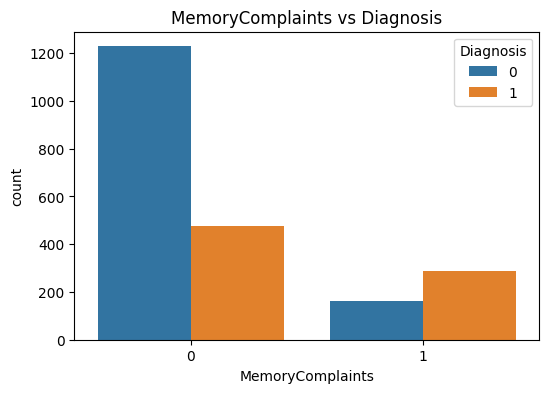

In [ ]:
# Define Features (X) and Target (y)

print(data.columns.tolist())
# Define target
y = data["Diagnosis"]

# Define features
X = data.drop(columns=["Diagnosis","DoctorInCharge"])

print("X shape:", X.shape)
print("y shape:", y.shape)

print("Unique target values:", y.unique())
y = y.astype(str).str.strip().str.lower()

#check data 

# 2. Numerical Feature Distribution

numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

print("Numerical Features:", numerical_cols)
X[numerical_cols].hist(figsize=(18,15), bins=20)
plt.tight_layout()
plt.show()

binary_cols = [col for col in X.columns if X[col].nunique() == 2]

print("Binary Features:", binary_cols)

plt.figure(figsize=(12,8))

for i, col in enumerate(binary_cols[:6], 1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, data=data)
    plt.title(col)

plt.tight_layout()
plt.show()

#correlation with target
# Select only numeric columns
numeric_data = data.select_dtypes(include=["int64", "float64"])

# Correlation with target
corr_with_target = numeric_data.corr()["Diagnosis"].sort_values(ascending=False)


print(corr_with_target)

plt.figure(figsize=(14,10))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()

# Chi-Square Test for Categorical Features


from scipy.stats import chi2_contingency

categorical_cols = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
    'FamilyHistoryAlzheimers', 'CardiovascularDisease',
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
    'MemoryComplaints', 'BehavioralProblems',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

chi_results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Diagnosis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi_results.append((col, chi2, p))

# Convert to DataFrame
chi_df = pd.DataFrame(chi_results, columns=['Feature', 'Chi2', 'p-value'])

# Sort by p-value (most significant first)
chi_df = chi_df.sort_values(by='p-value')

print(chi_df)

plt.figure(figsize=(6,4))
sns.countplot(x="MemoryComplaints", hue="Diagnosis", data=data)
plt.title("MemoryComplaints vs Diagnosis")
plt.show()





                      Feature  MI Score
24       FunctionalAssessment  0.095454
27                        ADL  0.076564
23                       MMSE  0.066278
25           MemoryComplaints  0.045756
26         BehavioralProblems  0.025576
0                   PatientID  0.019716
7          AlcoholConsumption  0.017780
21             CholesterolHDL  0.017349
18                DiastolicBP  0.012995
30         PersonalityChanges  0.012950
10               SleepQuality  0.009691
2                      Gender  0.008688
8            PhysicalActivity  0.007947
15                 HeadInjury  0.003812
6                     Smoking  0.003724
32              Forgetfulness  0.003218
4              EducationLevel  0.002830
1                         Age  0.001893
3                   Ethnicity  0.000780
19           CholesterolTotal  0.000338
9                 DietQuality  0.000000
31  DifficultyCompletingTasks  0.000000
29             Disorientation  0.000000
28                  Confusion  0.000000


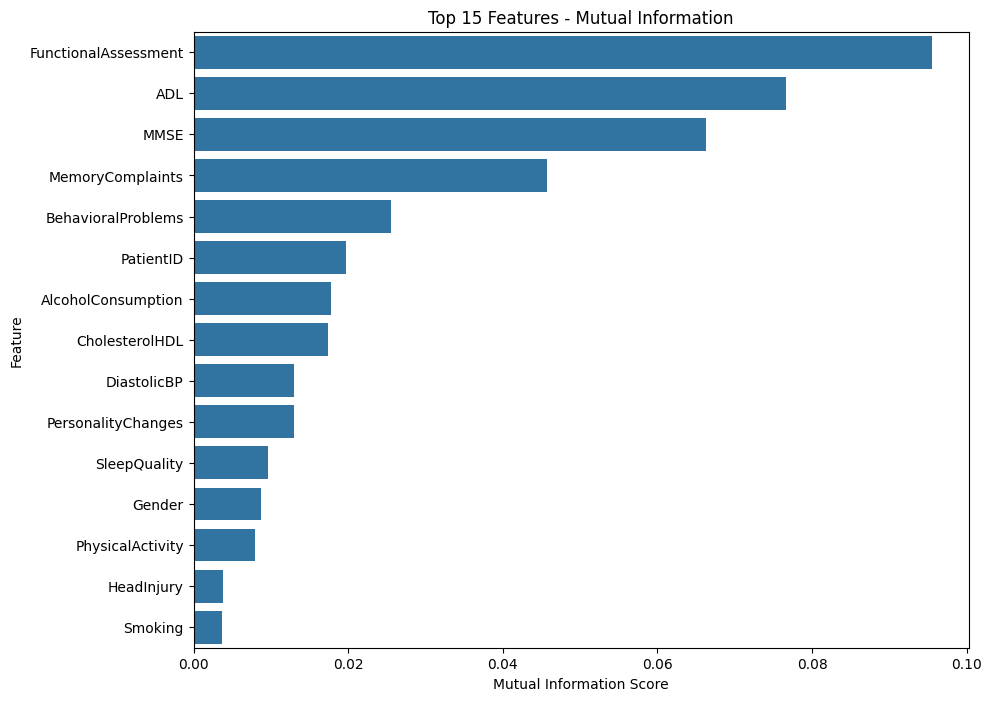

In [ ]:
#run Mutual Information
from sklearn.feature_selection import mutual_info_classif


mi_scores = mutual_info_classif(X, y)

mi_df = pd.DataFrame({
    "Feature": X.columns,
    "MI Score": mi_scores
}).sort_values(by="MI Score", ascending=False)

print(mi_df)

plt.figure(figsize=(10,8))

sns.barplot(
    x="MI Score",
    y="Feature",
    data=mi_df.head(15)
)

plt.title("Top 15 Features - Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()


                      Feature  Coefficient
24       FunctionalAssessment    -1.289510
27                        ADL    -1.227868
25           MemoryComplaints     1.043907
23                       MMSE    -0.907250
26         BehavioralProblems     0.903949
0                   PatientID     0.147637
20             CholesterolLDL    -0.122194
21             CholesterolHDL     0.105796
6                     Smoking    -0.100151
10               SleepQuality    -0.095477
1                         Age    -0.092997
15                 HeadInjury    -0.092768
4              EducationLevel    -0.079788
16               Hypertension     0.075033
22   CholesterolTriglycerides     0.073021
28                  Confusion    -0.059237
12      CardiovascularDisease     0.051601
29             Disorientation    -0.048558
11    FamilyHistoryAlzheimers    -0.046735
7          AlcoholConsumption    -0.045854
18                DiastolicBP     0.035222
31  DifficultyCompletingTasks     0.034414
3          

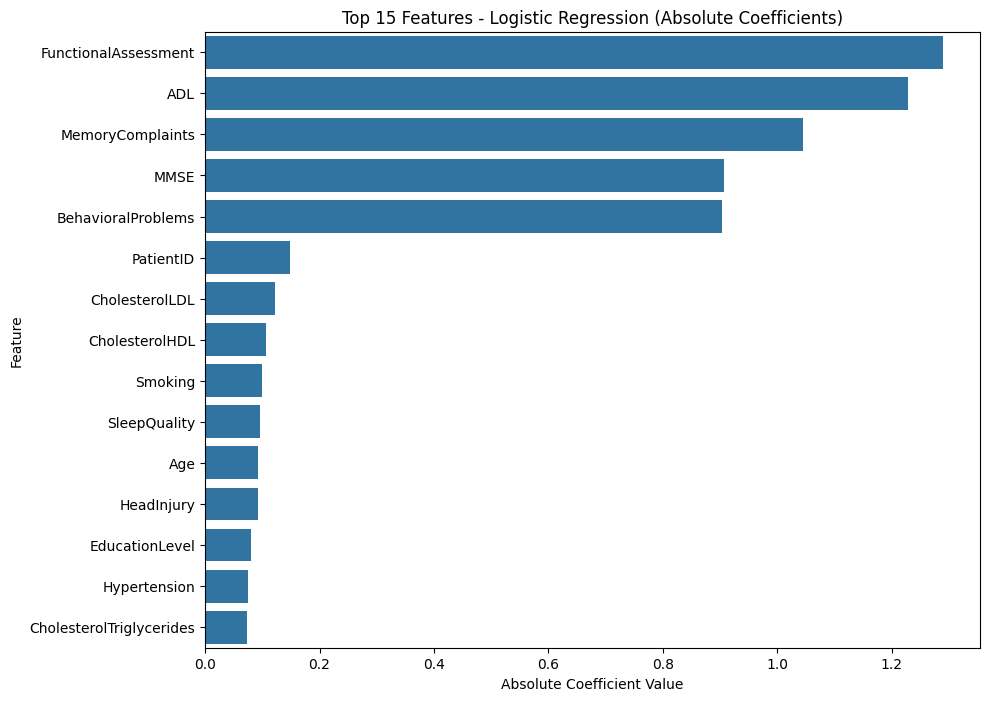

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=5000)
model.fit(X_scaled, y)

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)

# Add absolute coefficient column
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()

coef_sorted = coef_df.sort_values(
    by="Abs_Coefficient", ascending=False
).head(15)

plt.figure(figsize=(10,8))

sns.barplot(
    x="Abs_Coefficient",
    y="Feature",
    data=coef_sorted
)

plt.title("Top 15 Features - Logistic Regression (Absolute Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()


                      Feature  Importance
24       FunctionalAssessment    0.185559
27                        ADL    0.158307
23                       MMSE    0.121567
25           MemoryComplaints    0.091088
0                   PatientID    0.048088
26         BehavioralProblems    0.047423
22   CholesterolTriglycerides    0.026471
10               SleepQuality    0.026427
9                 DietQuality    0.026295
5                         BMI    0.026144
20             CholesterolLDL    0.025589
21             CholesterolHDL    0.025271
8            PhysicalActivity    0.024904
7          AlcoholConsumption    0.024340
19           CholesterolTotal    0.024301
17                 SystolicBP    0.022492
18                DiastolicBP    0.021501
1                         Age    0.020559
4              EducationLevel    0.008234
3                   Ethnicity    0.007003
16               Hypertension    0.003797
2                      Gender    0.003487
32              Forgetfulness    0

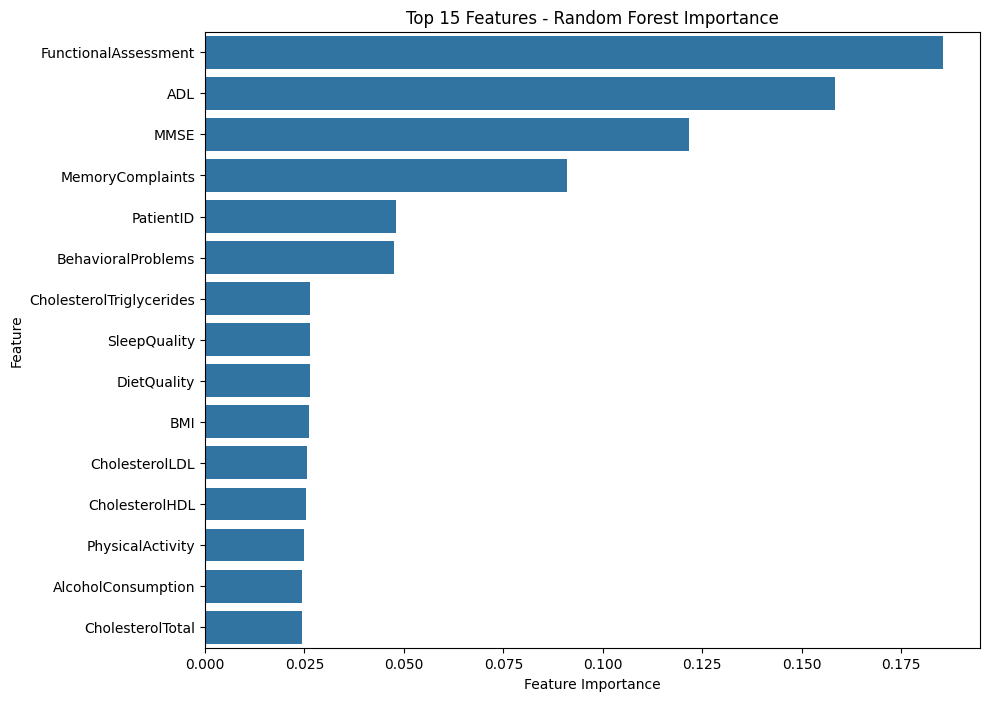

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance_df)

plt.figure(figsize=(10,8))

sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df.head(15)
)

plt.title("Top 15 Features - Random Forest Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


In [50]:
#Comparte Top features from all methods
top_mi = set(mi_df.head(10)["Feature"])
top_rf = set(importance_df.head(10)["Feature"])
top_lr = set(coef_sorted["Feature"])

print("Common Important Features:")
print(top_mi & top_rf & top_lr)


Common Important Features:
{'ADL', 'FunctionalAssessment', 'MMSE', 'BehavioralProblems', 'MemoryComplaints', 'PatientID'}


In [51]:
#Preprocessing Pipeline

# Define Feature Groups
# ================================

numerical_cols = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE',
    'FunctionalAssessment', 'ADL'
]

binary_cols = [
    'Gender', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression',
    'HeadInjury', 'Hypertension', 'MemoryComplaints',
    'BehavioralProblems', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks',
    'Forgetfulness'
]

categorical_cols = ['Ethnicity']

ordinal_cols = ['EducationLevel']

# Build Preprocessing Transformer
# ================================

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('bin', 'passthrough', binary_cols),
        ('ord', 'passthrough', ordinal_cols)
    ]
)

from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor)
])


In [52]:
#Train Test split 
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Diagnosis", "DoctorInCharge"])
y = data["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1719, 33)
Test shape: (430, 33)


Accuracy: 0.813953488372093

Confusion Matrix:
[[219  59]
 [ 21 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       278
           1       0.69      0.86      0.77       152

    accuracy                           0.81       430
   macro avg       0.80      0.82      0.81       430
weighted avg       0.83      0.81      0.82       430


ROC-AUC Score: 0.8852943960620977


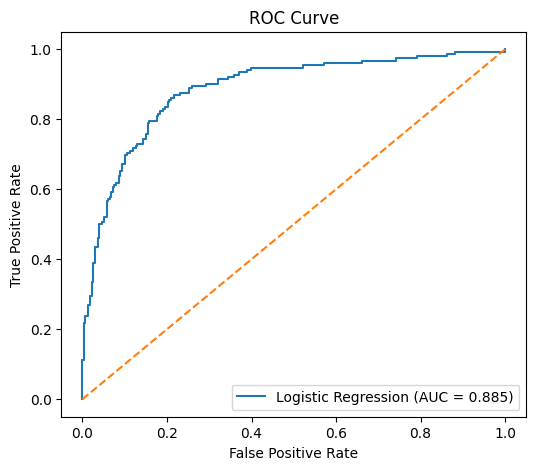

In [53]:
#Logistic Regression Model
class_weight="balanced"

from sklearn.linear_model import LogisticRegression

log_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(
        max_iter=5000,
        class_weight="balanced",
        random_state=42
    ))
])

# Train
log_model.fit(X_train, y_train)

# Predict class labels
y_pred = log_model.predict(X_test)

# Predict probabilities (for ROC)
y_prob = log_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [54]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42
    ))
])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", acc_rf)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("\nROC-AUC Score:", roc_auc_rf)


Accuracy: 0.9325581395348838

Confusion Matrix:
[[271   7]
 [ 22 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       278
           1       0.95      0.86      0.90       152

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430


ROC-AUC Score: 0.9428246876183264


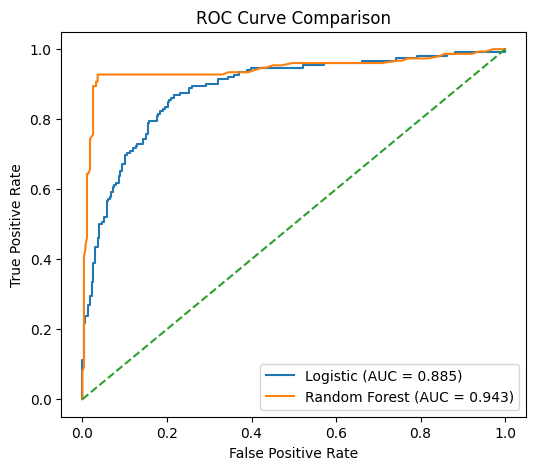

In [55]:
#comparing ROC curves

# Logistic already computed earlier

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))

# Logistic curve
plt.plot(fpr, tpr, label=f"Logistic (AUC = {roc_auc:.3f})")

# Random Forest curve
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
